In [1]:
import numpy
import os

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
plt.rcParams.update({
    "font.family": "serif",  # use serif/main font for text elements
    "text.usetex": False,     # use inline math for ticks
    "pgf.rcfonts": False,    # don't setup fonts from rc parameters
})

In [15]:
import pp_util
import importlib
importlib.reload(pp_util)

<module 'pp_util' from '/home/jsewall/misc/pp/2020/metrics/scripts/pp_util.py'>

In [5]:
qual_colormap = plt.get_cmap("tab10")
plat_order=["OpenMP", "Kokkos", "CUDA", "OpenACC", "OpenCL"]
csv_root="../data/"

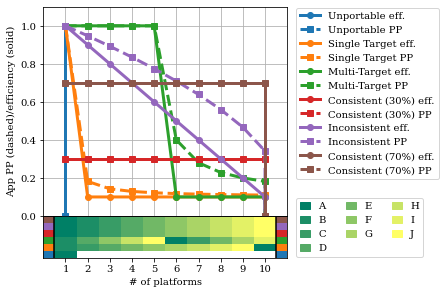

In [19]:
fig = plt.figure(figsize=(4, 4))
plat_colors = {}
plat_handles = []
synth_plats=[chr(x) for x in range(65, 75)]
plat_cmap = plt.get_cmap("summer")
for i, p in enumerate(synth_plats):
    plat_colors[p] = plat_cmap(float(i)/(len(synth_plats)-1))
    plat_handles.append(mpatches.Patch(color=plat_colors[p], label=p))

handles = {}
gs = fig.add_gridspec(1,1)
index = [0, 0]
app_eff = pp_util.read_effs(os.path.join(csv_root, "synthetic.csv"))
app_eff = sorted(list(app_eff.items()), key=lambda x: pp_util.harmean([i[1] for i in x[1]]))
appname="synthetic"
 
pp_util.plot_cascade(fig, gs, index, app_eff, appname, handles, app_colors=None, plat_colors=plat_colors)

handle_names, handle_lists = zip(*handles.items())
fig.legend(handle_lists, handle_names, loc='upper left', bbox_to_anchor=(1.0,1.0),ncol=1, handlelength=2.0)
fig.legend(handles=plat_handles, loc='lower left', bbox_to_anchor=(1.0,0.1), ncol=3, handlelength=1.0)
plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.0)
    
plt.savefig(f"../../images/synthetic_cascade.png", dpi = 300 ,bbox_inches="tight")

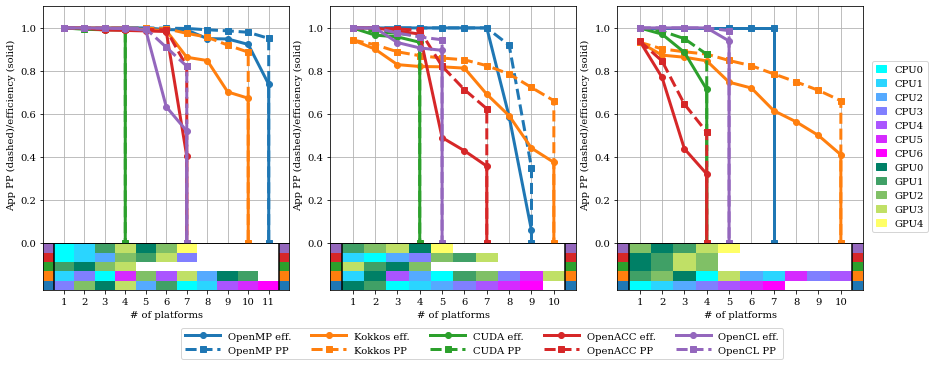

In [8]:
fig = plt.figure(figsize=(12, 5))
plat_colors = {}
gpu_handles = []
cpu_handles = []
handles = {}
gs = fig.add_gridspec(1,3)
for i, appfile in enumerate(["babelstream.csv", "cloverleaf.csv", "neutral.csv"]):
 
     #enumerate(["babelstream.csv", "cloverleaf.csv", "minifmm.csv", "neutral.csv", "tealeaf.csv"]):
    col = i-3*(i//3)
    row = i//3 
    index = [row, col]

    
    throughput=(appfile == "babelstream.csv")
    integrate=False
    appname=None
    pp_util.load_app_perfs(os.path.join(csv_root, appfile), throughput=throughput)
    
    if plat_colors == {}:
        gpus=[]
        cpus=[]
        for name,plat in pp_util.platforms.items():
            if 'GPU' in plat.types:
                gpus.append(name)
            if 'CPU' in plat.types:
                cpus.append(name)
        gpu_cmap = plt.get_cmap("summer")
        cpu_cmap = plt.get_cmap("cool")
        
        for i, p in enumerate(gpus):
            plat_colors[p] = gpu_cmap(float(i)/(len(gpus)-1))
            gpu_handles.append(mpatches.Patch(color=plat_colors[p], label=f"GPU{i}"))
        for i, p in enumerate(cpus):
            plat_colors[p] = cpu_cmap(float(i)/(len(cpus)-1))
            cpu_handles.append(mpatches.Patch(color=plat_colors[p], label=f"CPU{i}"))
    
    appname = os.path.splitext(os.path.basename(appfile))[0]
    effs = []
    for p in plat_order:
        ae=pp_util.app_effs(pp_util.apps[p], pp_util.platforms.keys(), throughput)
        effs.append((p, [(x[0].platform, x[1]) for x in ae]))
    pp_util.plot_cascade(fig, gs, index, effs, appname, handles, app_colors=None, plat_colors=plat_colors) 

handle_names, handle_lists = zip(*handles.items())
fig.legend(handle_lists, handle_names, loc='upper left', bbox_to_anchor=(0.20,0.11),handlelength=3.5, ncol=5)
fig.legend(handles=cpu_handles+gpu_handles, loc='upper left', bbox_to_anchor=(1.0,0.85),handlelength=1.0)
#fig.legend(handles=cpu_handles, loc='upper left', bbox_to_anchor=(1.0,0.5),handlelength=1.0)
plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.0)
plt.subplots_adjust(bottom=0.2)    
plt.savefig(f"../../images/app_platforms_cascade.png", dpi=300, bbox_inches="tight")